In [7]:
import pandas as pd
import os
import openpyxl

In [45]:
a = "X:\\Amar\\Python\\Study material\\Data analyst\\Data analyst project\\Covid 19\\covid_19_data_excel.xlsx"

covid_data = pd.read_excel(os.path.join(a), engine="openpyxl", sheet_name="covid_19_data")
covid_data_copy = covid_data.copy()
covid_data_copy

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7
...,...,...,...,...,...,...
316,4/29/2020,Wyoming,US,545,7,0
317,4/29/2020,Xinjiang,Mainland China,76,3,73
318,4/29/2020,Yukon,Canada,11,0,0
319,4/29/2020,Yunnan,Mainland China,185,2,181


<h1>Q. 1) Show the number of Confirmed, Deaths and Recovered cases in each Region.</h1>

In [12]:
covid_data_copy.count()

Date         321
State        140
Region       321
Confirmed    321
Deaths       321
Recovered    321
dtype: int64

In [46]:
covid_data_copy.isna().sum()

Date           0
State        181
Region         0
Confirmed      0
Deaths         0
Recovered      0
dtype: int64

In [47]:
covid_data_copy.groupby("Region")["Confirmed", "Deaths", "Recovered"].sum() # Cannot Write 3Columns with .sort_values(ascending = False)
# covid_data_copy.groupby("Region")["Confirmed"].sum().sort_values(ascending = False)

C:\Users\amarn\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Confirmed,Deaths,Recovered
Region,,,
Afghanistan,1939,60,252
Albania,766,30,455
Algeria,3848,444,1702
Andorra,743,42,423
Angola,27,2,7
...,...,...,...
West Bank and Gaza,344,2,71
Western Sahara,6,0,5
Yemen,6,0,1


<h1>By Using Seaborn library</h1>

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

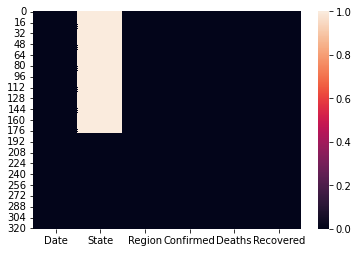

In [20]:
sns.heatmap(covid_data_copy.isna())

<h1>Q. 2) Remove all the records where the Confirmed Cases is Less Than 10.</h1>

In [43]:
covid_data_copy = covid_data_copy[~(covid_data_copy["Confirmed"] <10)]
covid_data_copy

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7
...,...,...,...,...,...,...
316,4/29/2020,Wyoming,US,545,7,0
317,4/29/2020,Xinjiang,Mainland China,76,3,73
318,4/29/2020,Yukon,Canada,11,0,0
319,4/29/2020,Yunnan,Mainland China,185,2,181


In [74]:
covid_data_copy.groupby("Region")["Confirmed"].sum()

Region
Afghanistan           1939
Albania                766
Algeria               3848
Andorra                743
Angola                  27
                      ... 
West Bank and Gaza     344
Western Sahara           6
Yemen                    6
Zambia                  97
Zimbabwe                32
Name: Confirmed, Length: 187, dtype: int64

<h1>Q. 3) In which Region, maximum number of Confirmed cases were recorded ?</h1>

In [66]:
covid_data_copy.groupby("Region").Confirmed.sum().sort_values(ascending = False)

Region
US                       1039909
Spain                     236899
Italy                     203591
France                    166543
UK                        166441
                          ...   
Sao Tome and Principe          8
Papua New Guinea               8
Bhutan                         7
Western Sahara                 6
Yemen                          6
Name: Confirmed, Length: 187, dtype: int64

<h1>Q. 4) In which Region, minimum number of Deaths cases were recorded ?</h1>

In [78]:
covid_data_copy.groupby("Region")["Deaths"].sum().sort_values(ascending= True)

Region
Laos              0
Mongolia          0
Mozambique        0
Cambodia          0
Fiji              0
              ...  
France        24121
Spain         24275
UK            26166
Italy         27682
US            60967
Name: Deaths, Length: 187, dtype: int64

<h1>Q. 5) How many Confirmed, Deaths & Recovered cases were reported from India till 29 April 2020 ?</h1>

In [85]:
covid_data_copy[covid_data_copy["Region"] == "India"]

,Date,State,Region,Confirmed,Deaths,Recovered
74,4/29/2020,NaN,India,33062,1079,8437


In [87]:
covid_data_copy[covid_data_copy["Region"] == "Yemen"]

,Date,State,Region,Confirmed,Deaths,Recovered
178,4/29/2020,NaN,Yemen,6,0,1


In [90]:
covid_data_copy[covid_data_copy["Region"] == "Canada"]

,Date,State,Region,Confirmed,Deaths,Recovered
183,4/29/2020,Alberta,Canada,5165,87,0
193,4/29/2020,British Columbia,Canada,2087,109,0
203,4/29/2020,Diamond Princess cruise ship,Canada,0,1,0
215,4/29/2020,Grand Princess,Canada,13,0,0
246,4/29/2020,Manitoba,Canada,275,6,0
259,4/29/2020,New Brunswick,Canada,118,0,0
266,4/29/2020,Newfoundland and Labrador,Canada,258,3,0
272,4/29/2020,Northwest Territories,Canada,5,0,0
273,4/29/2020,Nova Scotia,Canada,935,28,0
276,4/29/2020,Ontario,Canada,16978,1153,0


In [91]:
covid_data_copy[covid_data_copy["Region"] == "Russia"]

,Date,State,Region,Confirmed,Deaths,Recovered
134,4/29/2020,NaN,Russia,99399,972,10286


<h1>Q. 6-A ) Sort the entire data w.r.t. No. of Confirmed cases in ascending order.</h1>

In [99]:
covid_data_copy.sort_values(by=["Confirmed"], ascending = True)

,Date,State,Region,Confirmed,Deaths,Recovered
285,4/29/2020,Recovered,US,0,0,120720
284,4/29/2020,Recovered,Canada,0,0,20327
203,4/29/2020,Diamond Princess cruise ship,Canada,0,1,0
305,4/29/2020,Tibet,Mainland China,1,0,1
289,4/29/2020,Saint Pierre and Miquelon,France,1,0,0
...,...,...,...,...,...,...
57,4/29/2020,NaN,France,165093,24087,48228
168,4/29/2020,NaN,UK,165221,26097,0
80,4/29/2020,NaN,Italy,203591,27682,71252
153,4/29/2020,NaN,Spain,236899,24275,132929


<h1>Q. 6-B ) Sort the entire data wrt No. of Recovered cases in descending order.</h1>

In [101]:
covid_data_copy.sort_values(by = ["Recovered"],ascending=False)

,Date,State,Region,Confirmed,Deaths,Recovered
153,4/29/2020,NaN,Spain,236899,24275,132929
285,4/29/2020,Recovered,US,0,0,120720
61,4/29/2020,NaN,Germany,161539,6467,120400
76,4/29/2020,NaN,Iran,93657,5957,73791
80,4/29/2020,NaN,Italy,203591,27682,71252
...,...,...,...,...,...,...
248,4/29/2020,Maryland,US,20849,1078,0
246,4/29/2020,Manitoba,Canada,275,6,0
243,4/29/2020,Louisiana,US,27660,1845,0
241,4/29/2020,Kentucky,US,4537,234,0
